In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pylab
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster import hierarchy 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

In [2]:
df = pd.read_csv("customers.csv")

df["Annual Income (k$)"] = df["Annual Income (k$)"] * 1000

df = df.drop(columns=["CustomerID"])

columns = {"Gender": "Gender", "Age": "Age", "Annual Income (k$)": "Income", "Spending Score (1-100)": "Score"}

df = df.rename(columns=columns)

df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  200 non-null    int64
 1   Age     200 non-null    int64
 2   Income  200 non-null    int64
 3   Score   200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [3]:
scaler = StandardScaler()
x = df.values
x = scaler.fit_transform(x)
x

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [4]:
dist_matrix = euclidean_distances(x,x)
print(dist_matrix)

[[0.         1.63681098 2.38878538 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         3.54154808 ... 4.3182849  5.31878915 4.70189264]
 [2.38878538 3.54154808 0.         ... 5.42195122 5.13299938 5.90251765]
 ...
 [4.54611614 4.3182849  5.42195122 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 5.13299938 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 5.90251765 ... 0.5647686  2.5274803  0.        ]]


In [5]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\pc\AppData\Local\Temp\ipykernel_8820\1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


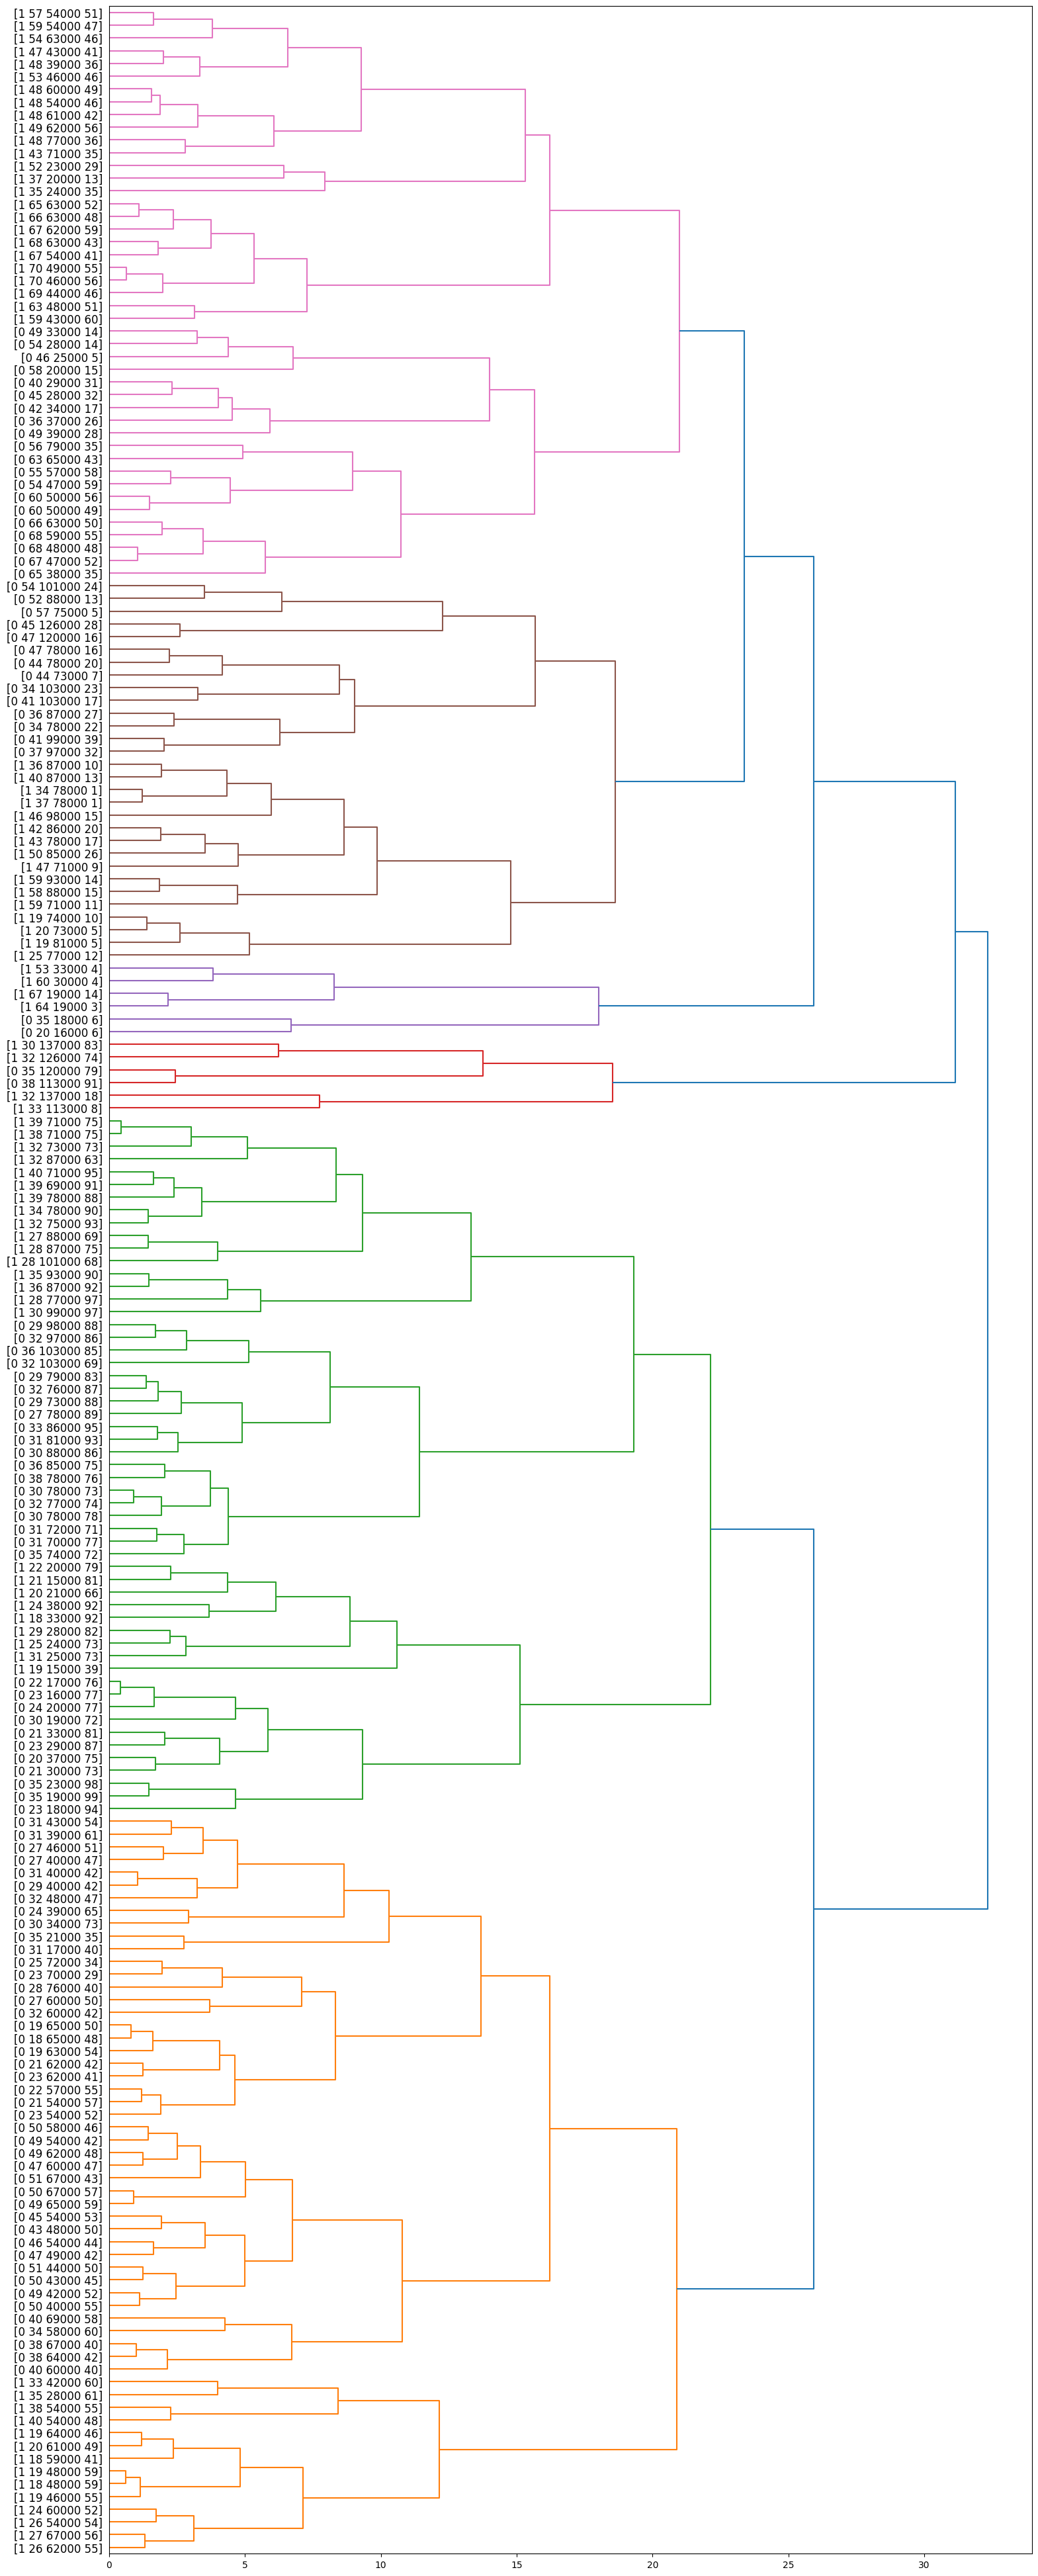

In [6]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s %s]' % (int(float(df['Gender'][id])), df['Age'][id], df['Income'][id], df['Score'][id])
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [7]:
hierarchical = AgglomerativeClustering(n_clusters=8, linkage='average')
hierarchical.fit(x)

AgglomerativeClustering(linkage='average', n_clusters=8)

In [8]:
clusters = hierarchical.labels_
clusters

array([5, 5, 4, 3, 4, 3, 4, 3, 0, 3, 0, 3, 4, 3, 5, 5, 4, 5, 0, 3, 5, 5,
       4, 5, 4, 5, 4, 5, 4, 3, 0, 3, 0, 5, 4, 3, 4, 3, 4, 3, 4, 5, 0, 3,
       4, 3, 4, 3, 3, 3, 4, 5, 3, 0, 4, 0, 4, 0, 3, 0, 0, 5, 4, 4, 0, 5,
       4, 4, 5, 3, 0, 4, 4, 4, 0, 5, 4, 0, 3, 4, 0, 0, 0, 4, 3, 0, 4, 3,
       4, 4, 4, 5, 0, 4, 4, 5, 4, 3, 0, 5, 3, 4, 0, 5, 0, 3, 4, 0, 0, 0,
       0, 3, 4, 5, 3, 3, 4, 4, 4, 4, 5, 4, 4, 2, 3, 7, 1, 2, 1, 2, 1, 2,
       3, 7, 1, 7, 6, 2, 1, 7, 6, 2, 3, 7, 1, 2, 1, 7, 6, 2, 1, 2, 6, 7,
       6, 7, 1, 7, 1, 7, 6, 7, 1, 7, 1, 7, 1, 7, 6, 2, 1, 2, 1, 2, 6, 7,
       1, 2, 1, 2, 6, 7, 1, 7, 6, 2, 6, 2, 6, 7, 6, 7, 1, 7, 6, 7, 6, 2,
       1, 2], dtype=int64)

In [11]:
df['CustomerType'] = hierarchical.labels_ + 1
print(df["CustomerType"].value_counts())
df.head()

CustomerType
5    44
4    32
1    27
6    23
8    21
2    20
3    18
7    15
Name: count, dtype: int64


,Gender,Age,Income,Score,CustomerType
0,1,19,15000,39,6
1,1,21,15000,81,6
2,0,20,16000,6,5
3,0,23,16000,77,4
4,0,31,17000,40,5


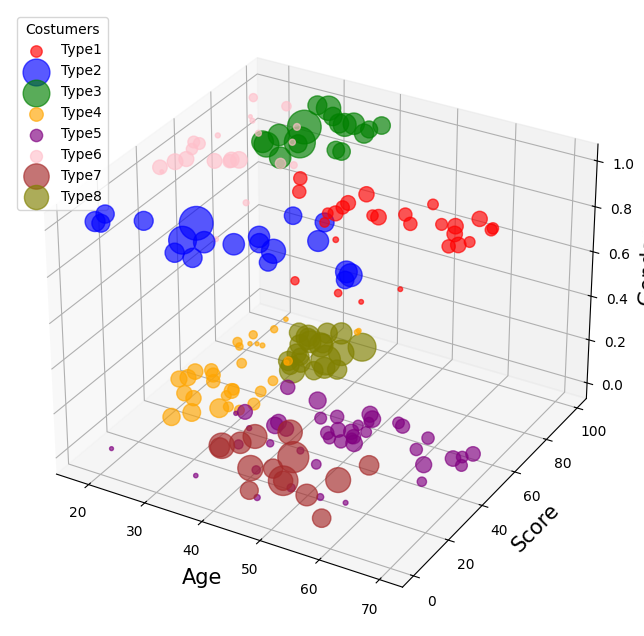

In [12]:
types = df["CustomerType"].value_counts()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatters = []
colors = ["red", "blue", "green", "orange", "purple", "pink", "brown", "olive", "gold", "cyan", "gray", "black"]

for i in range(1, len(types) + 1):
    x = df[df["CustomerType"] == i]["Age"].values
    y = df[df["CustomerType"] == i]["Score"].values
    z = df[df["CustomerType"] == i]["Gender"].values
    r = df[df["CustomerType"] == i]["Income"].values
    s = np.pi * (r ** 2) // 100000000
    
    scatter = ax.scatter(x, y, z, c=colors[i - 1], alpha=0.65, s=s, label=f"Type{i}")

    scatters.append(scatter)

ax.legend(handles=scatters, loc="upper left", title="Costumers")

ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Score", fontsize=15)
ax.set_zlabel("Gender", fontsize=15)

plt.show()

# X -> Age
# Y -> Score
# Z -> Gender (0, 1)
# Area -> Income

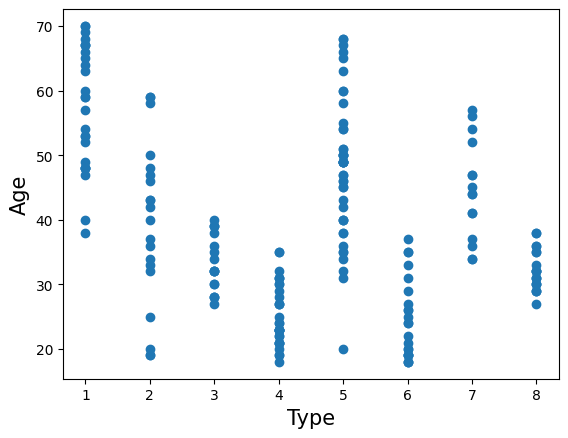

In [14]:
plt.scatter(df["CustomerType"], df["Age"])
plt.xlabel("Type", fontsize=15)
plt.ylabel("Age", fontsize=15)
plt.show()

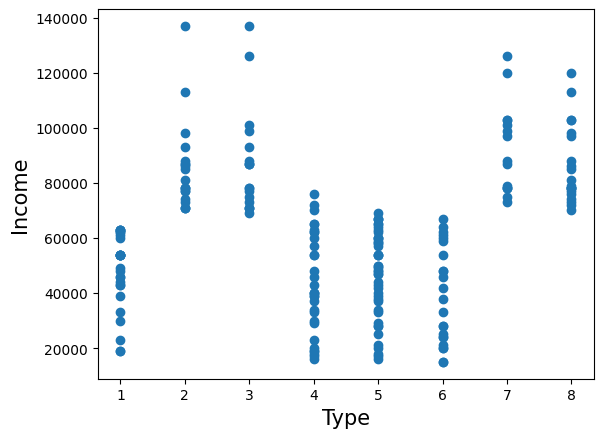

In [15]:
plt.scatter(df["CustomerType"], df["Income"])
plt.xlabel("Type", fontsize=15)
plt.ylabel("Income", fontsize=15)
plt.show()

# [2,3,7,8] are the type of customers that have higher income
# [1,4,5,6] lower income

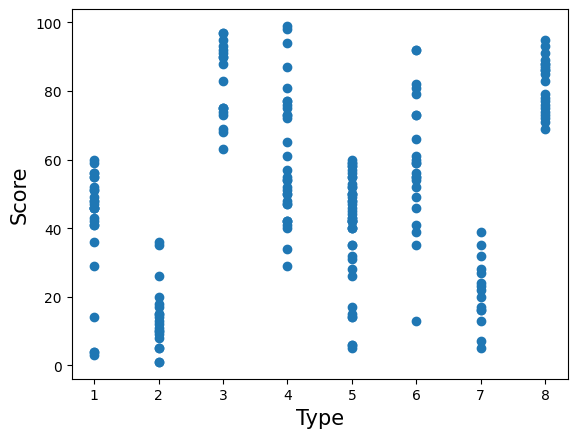

In [16]:
plt.scatter(df["CustomerType"], df["Score"])
plt.xlabel("Type", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.show()

In [17]:
df.groupby("CustomerType").mean()

,Gender,Age,Income,Score
CustomerType,,,,
1,1.0,57.370370,48259.259259,41.777778
2,1.0,39.500000,85150.000000,14.050000
3,1.0,33.277778,87111.111111,82.666667
4,0.0,25.250000,43437.500000,60.718750
5,0.0,48.045455,46681.818182,40.659091
6,1.0,24.565217,39217.391304,59.652174
7,0.0,44.600000,92333.333333,21.600000
8,0.0,32.190476,86047.619048,81.666667


So we have 8 type of customer:

1- [old] [low-income] [man] [mid-score]

2- [mid-age] [high-income] [man] [very-low-score]

3- [mid-age] [high-income] [man] [very-high-score]

4- [young] [low-income] [woman] [high-score]

5- [old] [low-income] [woman] [mid-score]

6- [young] [very-low-income] [man] [high-score]

7- [old] [very-high-income] [woman] [low-score]

8- [mid-age] [high-income] [woman] [very-high-score]